# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [24]:
cities_df = pd.read_csv(output_data_file)
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [25]:
cities_df.shape

(548, 10)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [27]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=61a3fd4f816266d6dc196b256851692a&units=metric&q=


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# set up lists to hold reponse info
lat = []
temp = []

for num, city in enumerate(cities, start=1):
    print("Processing Record {}: {}".format(num, city))
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        pprint(response)
            
    # Handle exceptions for a character that is not available in the Star Wars API
    except Exception as ex:
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print(message)
        print(url + city)

    if(num > 2):
        break
    
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

Processing Record 1: City_ID
An exception of type KeyError occurred. Arguments:
('coord',)
http://api.openweathermap.org/data/2.5/weather?City_ID
Processing Record 2: City
An exception of type TypeError occurred. Arguments:
("'module' object is not callable",)
http://api.openweathermap.org/data/2.5/weather?City
Processing Record 3: Cloudiness
An exception of type KeyError occurred. Arguments:
('coord',)
http://api.openweathermap.org/data/2.5/weather?Cloudiness
The latitude information received is: [-35.28]
The temperature information received is: [9.7]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [30]:
cities_df.describe()

,City_ID,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,548.000000,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,273.500000,49.405109,1.558379e+09,67.671533,19.665146,20.675529,64.970785,8.672682
std,158.338246,36.914201,7.820486e+01,23.697626,33.623560,90.307948,18.704318,5.865974
min,0.000000,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,136.750000,13.750000,1.558379e+09,52.000000,-6.267500,-61.015000,53.970000,4.680000
50%,273.500000,46.500000,1.558379e+09,71.000000,21.390000,21.240000,64.990000,7.010000
75%,410.250000,81.000000,1.558379e+09,86.000000,47.887500,102.937500,80.600000,11.410000
max,547.000000,100.000000,1.558379e+09,290.000000,78.220000,179.320000,104.100000,46.080000


In [5]:
cities_df = pd.DataFrame(list(zip(cities, lat, temp)), columns =['City Name', 'Lat', 'Temperature']) 
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

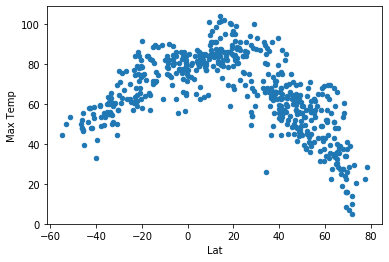

In [32]:
cities_df.plot.scatter(x="Lat", y="Max Temp")

#### Latitude vs. Humidity Plot

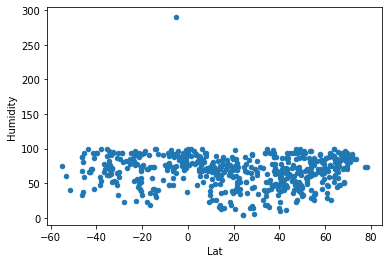

In [33]:
cities_df.plot.scatter(x="Lat", y="Humidity")

#### Latitude vs. Cloudiness Plot

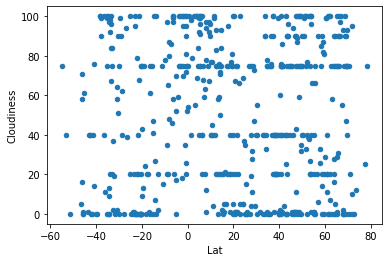

In [34]:
cities_df.plot.scatter(x="Lat", y="Cloudiness")

#### Latitude vs. Wind Speed Plot

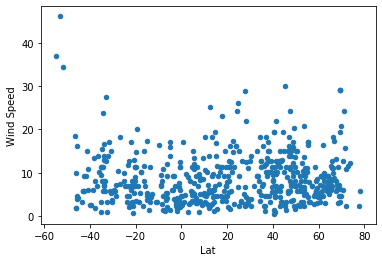

In [35]:
cities_df.plot.scatter(x="Lat", y="Wind Speed")

## Linear Regression

In [36]:
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [38]:
# OPTIONAL: Create a function to create Linear Regression plots
def calculate_temparature_nh(lat):
    return (-0.82*lat + 95.11)
calculate_temparature_nh(70)

def calculate_temparature_sh(lat):
    return (0.68*lat + 82.78)
calculate_temparature_sh(70)


37.71

In [41]:
# Create Northern DataFrames
cities_nf_df = cities_df.loc[(cities_df["Lat"] > 0)]
cities_nf_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93


In [42]:
# Create Southern Hemisphere DataFrames
cities_sf_df = cities_df.loc[(cities_df["Lat"] < 0)]
cities_sf_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
5,5,atuona,78,PF,1558378755,76,-9.80,-139.03,81.96,16.49
6,6,flinders,0,AU,1558378755,62,-34.58,150.85,60.01,11.41
7,7,opuwo,0,NaN,1558378523,23,-18.06,13.84,72.06,5.44


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

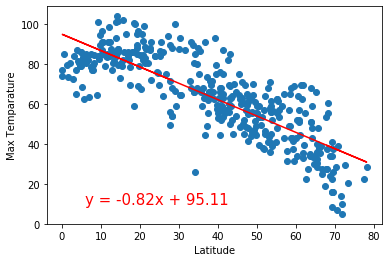

In [44]:
# Add the linear regression equation and line to plot
x_values = cities_nf_df['Lat']
y_values = cities_nf_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temparature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

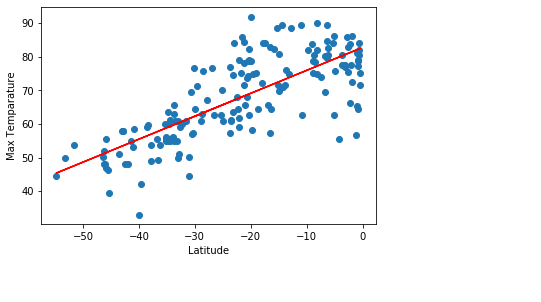

In [45]:
# Add the linear regression equation and line to plot
x_values = cities_sf_df['Lat']
y_values = cities_sf_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temparature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

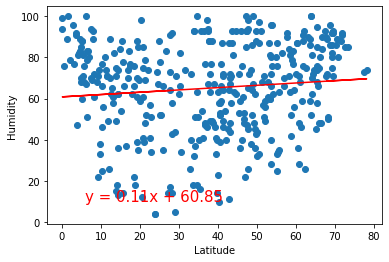

In [48]:
# Add the linear regression equation and line to plot
x_values = cities_nf_df['Lat']
y_values = cities_nf_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

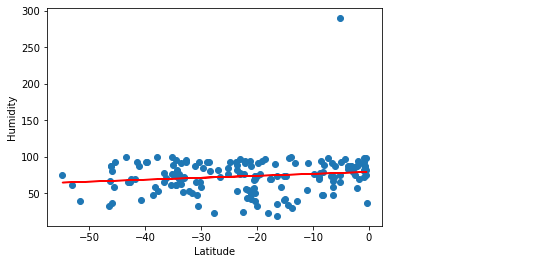

In [49]:
# Add the linear regression equation and line to plot
x_values = cities_sf_df['Lat']
y_values = cities_sf_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


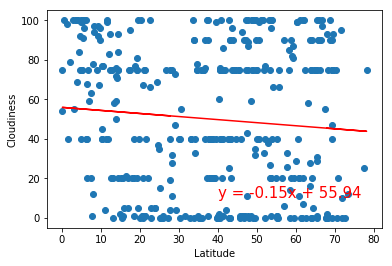

In [115]:
# Add the linear regression equation and line to plot
x_values = cities_nf_df['Lat']
y_values = cities_nf_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


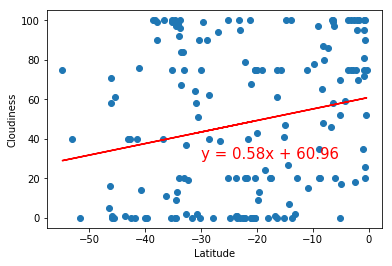

In [114]:
# Add the linear regression equation and line to plot
x_values = cities_sf_df['Lat']
y_values = cities_sf_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


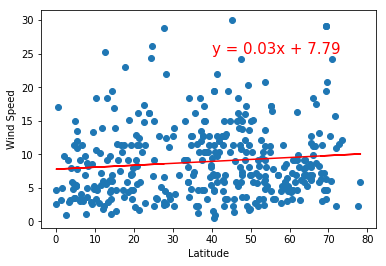

In [117]:
# Add the linear regression equation and line to plot
x_values = cities_nf_df['Lat']
y_values = cities_nf_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


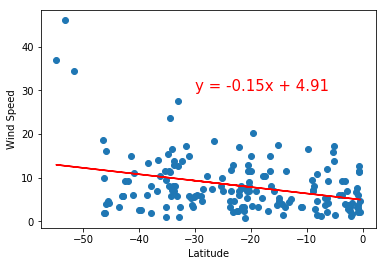

In [116]:
# Add the linear regression equation and line to plot
x_values = cities_sf_df['Lat']
y_values = cities_sf_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()